<a href="https://colab.research.google.com/github/ryanlei309/UK-Covid-19-data-analysis/blob/main/covid19_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [ ]:
import csv
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import requests
from typing import Iterable, Dict, Union, List
from json import dumps
from requests import get
from http import HTTPStatus

# **Activity 1**


### **1.1 Sub-activity: Open Data COVID-19 API**



**Task 1**

In [ ]:
# Function that sends a specific query to the API
# Refer to https://coronavirus.data.gov.uk/details/developers-guide/main-api
def get_API_data(filters, structure):
  """
  param filters: dictionary
  param structure: dictionary 
  """
  endpoint = "https://api.coronavirus.data.gov.uk/v1/data"

  api_params = {
      # "filters": filters,
      "filters": str.join(";", filters),  # QUESTION: Should I change this one to a dictionary?
      # "filters": dumps(structure, separators=(",", ":")),
      "structure": dumps(structure, separators=(",", ":")),
      "format": "json"
  }

  data = list()

  page_number = 1

  while True:
      # Adding page number to query params
      api_params["page"] = page_number

      response = get(endpoint, params=api_params, timeout=10)

      if response.status_code >= HTTPStatus.BAD_REQUEST:
          raise RuntimeError(f'Request failed: {response.text}')
      elif response.status_code == HTTPStatus.NO_CONTENT:
          break

      current_data = response.json()
      page_data: List[StructureType] = current_data['data']
      
      data.extend(page_data)

      # The "next" attribute in "pagination" will be `None`
      # when we reach the end.
      if current_data["pagination"]["next"] is None:
          break

      page_number += 1

  
  return data

if __name__ == "__main__":
  query_filters = [
        f"areaType=region"
    ]

  query_structure = {
        "date": "date",
        "name": "areaName",
        "code": "areaCode",
        "daily": "newCasesBySpecimenDate",
        "cumulative": "cumCasesBySpecimenDate"
    }

  json_data = get_API_data(query_filters, query_structure)
  print("JSON:")
  print(f"Length:", len(json_data))
  print("Data (first 3 items):", json_data[:3])

  print("---" * 10)


JSON:
Length: 6589
Data (first 3 items): [{'date': '2022-02-14', 'name': 'North East', 'code': 'E12000001', 'daily': 1002, 'cumulative': 819386}, {'date': '2022-02-13', 'name': 'North East', 'code': 'E12000001', 'daily': 1268, 'cumulative': 818384}, {'date': '2022-02-12', 'name': 'North East', 'code': 'E12000001', 'daily': 1085, 'cumulative': 817116}]
------------------------------


**Task 2**

In [ ]:
# Function that sends a specific query to the API
# Refer to https://coronavirus.data.gov.uk/details/developers-guide/main-api
def get_API_data(filters, structure):
  """
  param filters: dictionary
  param structure: dictionary 
  """
  endpoint = "https://api.coronavirus.data.gov.uk/v1/data"

  api_params = {
      "filters": filters,
      "structure": dumps(structure, separators=(",", ":")),
      "format": "json"
  }

  data = list()

  page_number = 1

  while True:
      # Adding page number to query params
      api_params["page"] = page_number

      response = get(endpoint, params=api_params, timeout=10)

      if response.status_code >= HTTPStatus.BAD_REQUEST:
          raise RuntimeError(f'Request failed: {response.text}')
      elif response.status_code == HTTPStatus.NO_CONTENT:
          break

      current_data = response.json()
      page_data: List[StructureType] = current_data['data']
      
      data.extend(page_data)

      # The "next" attribute in "pagination" will be `None`
      # when we reach the end.
      if current_data["pagination"]["next"] is None:
          break

      page_number += 1

  
  return data

if __name__ == "__main__":
  query_filters = [
      "areaType=nation&",
      "areaType=region&"
  ]

  query_structure = {
      "date": "date",
      "name": "areaName",
      "daily_cases": "newCasesBySpecimenDate",
      "cumulative_cases": "cumCasesBySpecimenDate",
      "daily_deaths": "newDeaths28DaysByPublishDate",
      "cumulative_deaths": "cumDeaths28DaysByPublishDate",
      "cumulative_vaccinated": "cumPeopleVaccinatedCompleteByVaccinationDate",
      "vaccination_age": "vaccinationsAgeDemographics"
  }

  results_json_national = get_API_data(query_filters[0], query_structure)
  results_json_regional = get_API_data(query_filters[1], query_structure)
  print("JSON:")
  print(f"Length:", len(results_json_national))
  print(f"Length:", len(results_json_regional))
  print("Data (first 3 items):", results_json_national[:3])
  print("Data (first 3 items):", results_json_regional[:3])

  print("---" * 10)




JSON:
Length: 2908
Length: 6599
Data (first 3 items): [{'date': '2022-02-15', 'name': 'England', 'daily_cases': None, 'cumulative_cases': None, 'daily_deaths': 214, 'cumulative_deaths': 139228, 'cumulative_vaccinated': None, 'vaccination_age': []}, {'date': '2022-02-14', 'name': 'England', 'daily_cases': 22815, 'cumulative_cases': 15684719, 'daily_deaths': 23, 'cumulative_deaths': 139014, 'cumulative_vaccinated': 40663230, 'vaccination_age': [{'age': '12_15', 'VaccineRegisterPopulationByVaccinationDate': 2887584.0, 'cumPeopleVaccinatedCompleteByVaccinationDate': 658416.0, 'newPeopleVaccinatedCompleteByVaccinationDate': 7261.0, 'cumPeopleVaccinatedFirstDoseByVaccinationDate': 1601915.0, 'newPeopleVaccinatedFirstDoseByVaccinationDate': 1902.0, 'cumPeopleVaccinatedSecondDoseByVaccinationDate': 658416.0, 'newPeopleVaccinatedSecondDoseByVaccinationDate': 7261.0, 'cumPeopleVaccinatedThirdInjectionByVaccinationDate': 3533.0, 'newPeopleVaccinatedThirdInjectionByVaccinationDate': 61.0, 'cumVacc

### **1.2 Sub-activity: Shaping the COVID data into different dataframes**

**Task 3**

In [ ]:
# Concatenate the two lists of dictionaries into a single list
temp_results = results_json_national + results_json_regional

print(temp_results)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



**Task 4**

In [ ]:
# Transform list into a dataframe
covid_data = pd.DataFrame(temp_results)

**Task 5**

In [ ]:
# Erase all rows in which the name column have the value “England”
covid_data = covid_data[covid_data.name != 'England']

**Task 6**

In [ ]:
covid_data = covid_data.rename(columns={'name': 'area'})



**Task 7**

In [ ]:
# Convert date column to the datetime type

covid_data['date']= pd.to_datetime(covid_data['date']) 

**Task 8**

In [ ]:
# Summary of covid_data dataframe
covid_data.info()

# The amount of missing data
print('')
print('##########################################################')
print('')
print('The amount of missing data in each column: ')
covid_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8759 entries, 748 to 9506
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   8759 non-null   datetime64[ns]
 1   area                   8759 non-null   object        
 2   daily_cases            8746 non-null   float64       
 3   cumulative_cases       8746 non-null   float64       
 4   daily_deaths           7000 non-null   float64       
 5   cumulative_deaths      7033 non-null   float64       
 6   cumulative_vaccinated  4320 non-null   float64       
 7   vaccination_age        8759 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 615.9+ KB

##########################################################

The amount of missing data in each column: 


date                        0
area                        0
daily_cases                13
cumulative_cases           13
daily_deaths             1759
cumulative_deaths        1726
cumulative_vaccinated    4439
vaccination_age             0
dtype: int64


### **My decision about the missing data:**
Because every data should be unique in this case, 
I would delete all the rows with any missing data.

**Task 9**

In [ ]:
# Replace missing value in cumulative_deaths, cumulative_cases, and cumulative_vaccinated
# Sort all the data by different area
covid_data_by_area = covid_data.reset_index().sort_values(['area', 'date'], ascending=[True, False]).set_index('index').rename_axis(None)

# Save unique area in a list.
areas_lst = covid_data_by_area['area'].unique()

# Empty dataframe to store the data after replace missing value in cumulative_deaths, cumulative_cases, and cumulative_vaccinated
organized_c_deaths = []
organized_c_cases = []
organized_c_vac = []

# Loop over the areas, replace missing values in cumulative_deaths, cumulative_cases, and cumulative_vaccinated
for area in areas_lst:

  # Extract dataframe by area
  covid_data_certain_area = covid_data_by_area[covid_data_by_area['area'] == area]
  
  # Replace missing values.
  covid_data_certain_area['cumulative_deaths'] = covid_data_certain_area['cumulative_deaths'].fillna(method = 'bfill')
  covid_data_certain_area['cumulative_cases'] = covid_data_certain_area['cumulative_cases'].fillna(method = 'bfill')
  covid_data_certain_area['cumulative_vaccinated'] = covid_data_certain_area['cumulative_vaccinated'].fillna(method = 'bfill')

  # Append organized data into a list.
  organized_c_deaths.extend(covid_data_certain_area['cumulative_deaths'].tolist())
  organized_c_cases.extend(covid_data_certain_area['cumulative_cases'].tolist())
  organized_c_vac.extend(covid_data_certain_area['cumulative_vaccinated'].tolist())

# Replace column by area
covid_data_by_area['cumulative_deaths'] = organized_c_deaths
covid_data_by_area['cumulative_cases'] = organized_c_cases
covid_data_by_area['cumulative_vaccinated'] = organized_c_vac

# Reorder the data by index
covid_data_by_area = covid_data_by_area.sort_index()

# Assign covid data by area to covid data
covid_data = covid_data_by_area


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

**Task 10**

In [ ]:
# Remove the rows that still have missing values in the cumulative metrics
covid_data = covid_data.dropna(subset=['cumulative_cases', 'cumulative_deaths', 'cumulative_vaccinated'])


**Task 11**

In [ ]:
# Rolling averages are often better indicators of daily quantitative metrics than raw daily measures

# Replace missing value in cumulative_deaths, cumulative_cases, and cumulative_vaccinated
# Sort all the data by different area
covid_data_by_area = covid_data.reset_index().sort_values(['area', 'date'], ascending=[True, False]).set_index('index').rename_axis(None)

# Save unique area in a list.
areas_lst = covid_data_by_area['area'].unique()

# Empty dataframe to store the data after replace missing value in cumulative_deaths, cumulative_cases, and cumulative_vaccinated
daily_cases_roll_avg = []
daily_deaths_roll_avg = []

# Loop over the areas, add daily cases and deaths rolling average to the data frame
for area in areas_lst:

  # Extract dataframe by area
  covid_data_certain_area = covid_data_by_area[covid_data_by_area['area'] == area]

  # Append rolling average into a list.
  daily_cases_roll_avg.extend(covid_data_certain_area.iloc[:,2].rolling(window=7).mean().tolist())
  daily_deaths_roll_avg.extend(covid_data_certain_area.iloc[:,4].rolling(window=7).mean().tolist())

# Add new columns to store daily rolling average
covid_data_by_area['daily_cases_roll_avg'] = daily_cases_roll_avg
covid_data_by_area['daily_deaths_roll_avg'] = daily_deaths_roll_avg

# Reorder the data by index
covid_data_by_area = covid_data_by_area.sort_index()

# Assign covid data by area to covid data
covid_data = covid_data_by_area




**Task 12**

In [ ]:
# Drop the columns daily_cases and daily_deaths
covid_data = covid_data.drop(columns=['daily_cases', 'daily_deaths'])


**Task 13**

In [ ]:
# Empty list to store data
date_list = covid_data['date'].tolist()
area_list = covid_data['area'].tolist()
v_list = covid_data['vaccination_age'].tolist()

# New dataframe to store date, area and vaccination age
covid_data_vaccinations = pd.DataFrame(columns=['date', 'area', 'vaccination_age'])
covid_data_vaccinations['date'] = date_list
covid_data_vaccinations['area'] = area_list
covid_data_vaccinations['vaccination_age'] = v_list

# Drop vaccination age column from covid data
covid_data = covid_data.drop(['vaccination_age'], axis=1)

# Reorder the covid data and covid data vaccinations by index
covid_data = covid_data.sort_index(ascending=False)
covid_data_vaccinations = covid_data_vaccinations.sort_index(ascending=False)


**Task 14**

In [ ]:
# Empty data frame
temp_df = pd.DataFrame()

# Empty list to store the value by column
temp_date = []
temp_area = []
temp_age = []
temp_VaccineRegisterPopulationByVaccinationDate = []
temp_cumPeopleVaccinatedCompleteByVaccinationDate = []
temp_newPeopleVaccinatedCompleteByVaccinationDate = []
temp_cumPeopleVaccinatedFirstDoseByVaccinationDate = []
temp_newPeopleVaccinatedFirstDoseByVaccinationDate = []
temp_cumPeopleVaccinatedSecondDoseByVaccinationDate = []
temp_newPeopleVaccinatedSecondDoseByVaccinationDate = []
temp_cumVaccinationFirstDoseUptakeByVaccinationDatePercentage = []
temp_cumVaccinationCompleteCoverageByVaccinationDatePercentage = []
temp_cumVaccinationSecondDoseUptakeByVaccinationDatePercentage = []

# Loop over by rows
for index, row in covid_data_vaccinations.iterrows():

  # Variable to store the row
  temp_row = row

  # Extract the value of column vaccination age 
  temp_v_age = temp_row['vaccination_age']

  # Loop over the dictionary of vaccination age
  for i in range(len(temp_v_age)):
    
    # Add date and area value in rows by the length of vaccination age
    temp_date.append(temp_row['date'])
    temp_area.append(temp_row['area'])

    # Loop over vaccination age dictionary, and add all the details to each column list
    for key, value in temp_v_age[i].items():
      
      if key == 'age':
        temp_age.append(value)
      
      if key == 'VaccineRegisterPopulationByVaccinationDate':
        temp_VaccineRegisterPopulationByVaccinationDate.append(value)

      if key == 'cumPeopleVaccinatedCompleteByVaccinationDate':
        temp_cumPeopleVaccinatedCompleteByVaccinationDate.append(value)

      if key == 'newPeopleVaccinatedCompleteByVaccinationDate':
        temp_newPeopleVaccinatedCompleteByVaccinationDate.append(value)

      if key == 'cumPeopleVaccinatedFirstDoseByVaccinationDate':
        temp_cumPeopleVaccinatedFirstDoseByVaccinationDate.append(value)

      if key == 'newPeopleVaccinatedFirstDoseByVaccinationDate':
        temp_newPeopleVaccinatedFirstDoseByVaccinationDate.append(value)

      if key == 'cumPeopleVaccinatedSecondDoseByVaccinationDate':
        temp_cumPeopleVaccinatedSecondDoseByVaccinationDate.append(value)

      if key == 'newPeopleVaccinatedSecondDoseByVaccinationDate':
        temp_newPeopleVaccinatedSecondDoseByVaccinationDate.append(value)

      if key == 'cumVaccinationFirstDoseUptakeByVaccinationDatePercentage':
        temp_cumVaccinationFirstDoseUptakeByVaccinationDatePercentage.append(value)

      if key == 'cumVaccinationCompleteCoverageByVaccinationDatePercentage':
        temp_cumVaccinationCompleteCoverageByVaccinationDatePercentage.append(value)

      if key == 'cumVaccinationSecondDoseUptakeByVaccinationDatePercentage':
        temp_cumVaccinationSecondDoseUptakeByVaccinationDatePercentage.append(value)
      

# Concatenate all the lists to temp_df
temp_df = pd.concat([temp_df, pd.Series(temp_date)], ignore_index = True, axis = 1)
temp_df = pd.concat([temp_df, pd.Series(temp_area)], ignore_index = True, axis = 1)
temp_df = pd.concat([temp_df, pd.Series(temp_age)], ignore_index=True, axis=1)
temp_df = pd.concat([temp_df, pd.Series(temp_VaccineRegisterPopulationByVaccinationDate)], ignore_index=True, axis=1)
temp_df = pd.concat([temp_df, pd.Series(temp_cumPeopleVaccinatedCompleteByVaccinationDate)], ignore_index=True, axis=1)
temp_df = pd.concat([temp_df, pd.Series(temp_newPeopleVaccinatedCompleteByVaccinationDate)], ignore_index=True, axis=1)
temp_df = pd.concat([temp_df, pd.Series(temp_cumPeopleVaccinatedFirstDoseByVaccinationDate)], ignore_index=True, axis=1)
temp_df = pd.concat([temp_df, pd.Series(temp_newPeopleVaccinatedFirstDoseByVaccinationDate)], ignore_index=True, axis=1)
temp_df = pd.concat([temp_df, pd.Series(temp_cumPeopleVaccinatedSecondDoseByVaccinationDate)], ignore_index=True, axis=1)
temp_df = pd.concat([temp_df, pd.Series(temp_newPeopleVaccinatedSecondDoseByVaccinationDate)], ignore_index=True, axis=1)
temp_df = pd.concat([temp_df, pd.Series(temp_cumVaccinationFirstDoseUptakeByVaccinationDatePercentage)], ignore_index=True, axis=1)
temp_df = pd.concat([temp_df, pd.Series(temp_cumVaccinationCompleteCoverageByVaccinationDatePercentage)], ignore_index=True, axis=1)
temp_df = pd.concat([temp_df, pd.Series(temp_cumVaccinationSecondDoseUptakeByVaccinationDatePercentage)], ignore_index=True, axis=1)

# Column names for the dataframe
column_names = {0:'date', 1:'area', 2:'age', 3:'VaccineRegisterPopulationByVaccinationDate'
, 4:'cumPeopleVaccinatedCompleteByVaccinationDate', 5:'newPeopleVaccinatedCompleteByVaccinationDate'
, 6:'cumPeopleVaccinatedFirstDoseByVaccinationDate', 7:'newPeopleVaccinatedFirstDoseByVaccinationDate'
, 8:'cumPeopleVaccinatedSecondDoseByVaccinationDate', 9:'newPeopleVaccinatedSecondDoseByVaccinationDate'
, 10:'cumVaccinationFirstDoseUptakeByVaccinationDatePercentage', 11:'cumVaccinationCompleteCoverageByVaccinationDatePercentage'
, 12:'cumVaccinationSecondDoseUptakeByVaccinationDatePercentage'}

# Rename the dataframe
temp_df.rename(columns=column_names)

# Pass temp dataframe to covid_data_vaccinations_wide
covid_data_vaccinations_wide = temp_df

# Rename the columns of covid_data_vaccinations_wide
covid_data_vaccinations_wide = covid_data_vaccinations_wide.rename(columns=column_names)



### **1.3 Sub-activity: Aggregating, plotting, and analysing**

**Task 15**

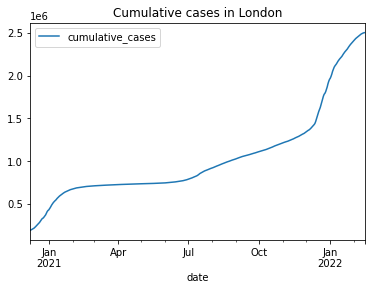

In [ ]:
# 1. Aggregate the data as an intermediate dataframe
intermediate_df = covid_data.loc[covid_data['area'] == 'London']


# 2. Plot to visualised the transformed data
intermediate_df.plot(x = 'date', y = 'cumulative_cases', title = 'Cumulative cases in London')


# 3. Is there a period in time in which the cases plateaued?
# Answer: From February 2021 to mid of June 2021, the cases in London was plateaued.


**Task 16**

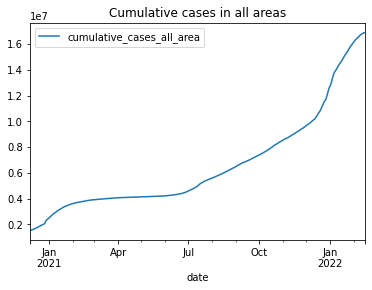

In [ ]:
# 1. Aggregate the data as an intermediate dataframe

# Get the unique date to a array
unique_date = covid_data['date'].unique()

# Empty list to store cumulative cases in all areas
cumulative_cases_all_area = []

# Create a intermediate datafame by date
intermediate_df = pd.DataFrame(unique_date, columns = ['date'])

# Use the array to loop over and sum up cumulative cases in all area.
for date in unique_date:
  temp_covid_data =  covid_data.loc[covid_data['date'] == date]
  temp_sum = temp_covid_data['cumulative_cases'].sum()
  cumulative_cases_all_area.append(temp_sum)

# Add cumulative cases in all areas as a column to intermediate dataframe
intermediate_df = pd.concat([intermediate_df, pd.Series(cumulative_cases_all_area)], ignore_index = True, axis = 1)

# Rename the columns
intermediate_df = intermediate_df.rename(columns={0:'date', 1:'cumulative_cases_all_area'})


# 2. Plot to visualised the transformed data
intermediate_df.plot(x = 'date', y = 'cumulative_cases_all_area', title = 'Cumulative cases in all areas')


# 3. How does the pattern seen in London hold country-wide?
# Answer: The pattern of cumulative cases in London is similar to country wide.
#         From January to Feburary cumulative increase rapidly, and from Feburary
#         to mid June plateaued, after that cases increase in a positve slope.


**Task 17**

area
East Midlands               AxesSubplot(0.125,0.125;0.775x0.755)
East of England             AxesSubplot(0.125,0.125;0.775x0.755)
London                      AxesSubplot(0.125,0.125;0.775x0.755)
North East                  AxesSubplot(0.125,0.125;0.775x0.755)
North West                  AxesSubplot(0.125,0.125;0.775x0.755)
Scotland                    AxesSubplot(0.125,0.125;0.775x0.755)
South East                  AxesSubplot(0.125,0.125;0.775x0.755)
South West                  AxesSubplot(0.125,0.125;0.775x0.755)
West Midlands               AxesSubplot(0.125,0.125;0.775x0.755)
Yorkshire and The Humber    AxesSubplot(0.125,0.125;0.775x0.755)
Name: cumulative_cases, dtype: object

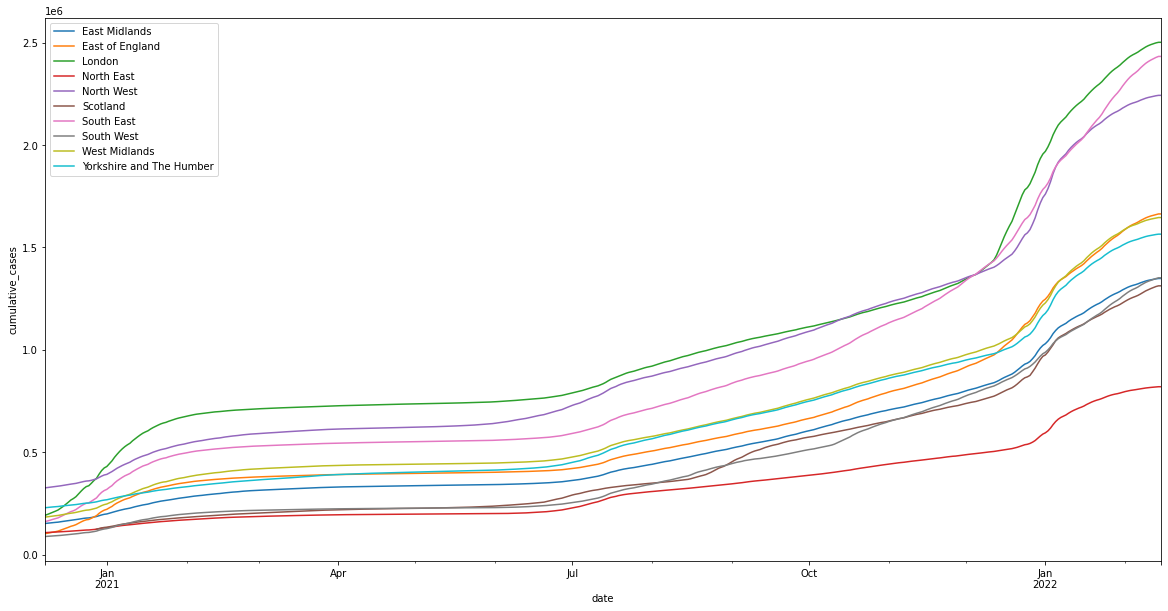

In [ ]:
# 1. Aggregate the data as an intermediate dataframe
intermediate_df = covid_data
intermediate_df.set_index("date", inplace=True)


# 2. Plot to visualised the transformed data
intermediate_df.reset_index()
intermediate_df.groupby('area')['cumulative_cases'].plot(legend=True, xlabel="date", ylabel="cumulative_cases", figsize=(20,10))


# 3. What patterns do all nations/regions share?
# Answer: All the nations/regions in UK share the same pattern that from
#         Feburary to the mid of June, cumulative cases was plateaued.

**Task 18**

In [ ]:
"""
Question: As a data scientist you will often need to interpret data insights, 
based on your own judgement and expertise. Considering the data and plot from 
the last question, what event could have taken place in June-July that could 
justify the trend seen from there onward?

Ans: As I know, the lift of lockdown happened and the UEFA EURO 2020 was hold on June 11, 2021, to July 11 2021. 
And England went to the final. During that period, the whole country is crazy about
the football games. I believe that is why after the mid of June, cumulative cases increased.
"""


'\nQuestion: As a data scientist you will often need to interpret data insights, \nbased on your own judgement and expertise. Considering the data and plot from \nthe last question, what event could have taken place in June-July that could \njustify the trend seen from there onward?\n\nAns: As I know, the lift of lockdown happened and the UEFA EURO 2020 was hold on June 11, 2021, to July 11 2021. \nAnd England went to the final. During that period, the whole country is crazy about\nthe football games. I believe that is why after the mid of June, cumulative cases increased.\n'

**Task 19**

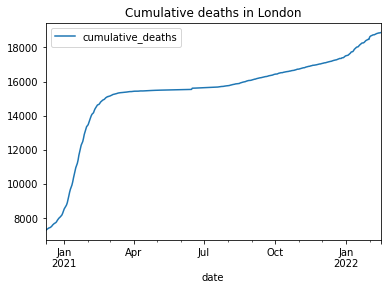

In [ ]:
# 1. Aggregate the data as an intermediate dataframe
intermediate_df = covid_data
intermediate_df = intermediate_df.loc[covid_data['area'] == 'London'].reset_index()


# 2. Plot to visualised the transformed data
intermediate_df.plot(x = 'date', y = 'cumulative_deaths', title = 'Cumulative deaths in London')


# 3. Is there a noticeable period in time when the ongoing trend is broken? When?
# Answer: Yes, from January 2021 to March 2021, the cumulative deaths skyrocketed.

**Task 20**

In [ ]:
"""
Question: Based on the data and plot from the last question, 
is there any similarity between trends in cumulative cases and cumulative deaths?

Answer: Yes, from January to Feburary, cumulative cases increase very fast, 
same as the cumulative deaths. Therefore, there is a same trend from January
to Feburary in cumulative cases and cumulative deaths.
"""

'\nQuestion: Based on the data and plot from the last question, \nis there any similarity between trends in cumulative cases and cumulative deaths?\n\nAnswer: Yes, from January to Feburary, cumulative cases increase very fast, \nsame as the cumulative deaths. Therefore, there is a same trend from January\nto Feburary in cumulative cases and cumulative deaths.\n'

**Task 21**

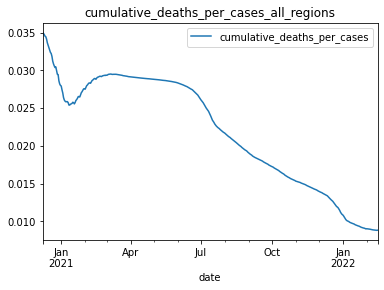

In [ ]:
# 1. Aggregate the data as an intermediate dataframe

# Get the unique date to a array
covid_data = covid_data.reset_index()
unique_date = covid_data['date'].unique()

# Empty list to store cumulative cases and cumulative deaths in all areas
cumulative_cases_all_area = []
cumulative_deaths_all_area = []

# Create a intermediate datafame by date
intermediate_df = pd.DataFrame(unique_date, columns = ['date'])

# Use the array to loop over and sum up cumulative cases in all area.
for date in unique_date:
  temp_covid_data =  covid_data.loc[covid_data['date'] == date]
  temp_cases_sum = temp_covid_data['cumulative_cases'].sum()
  temp_deaths_sum = temp_covid_data['cumulative_deaths'].sum()
  cumulative_cases_all_area.append(temp_cases_sum)
  cumulative_deaths_all_area.append(temp_deaths_sum)

# Add cumulative cases in all areas as a column to intermediate dataframe
intermediate_df = pd.concat([intermediate_df, pd.Series(cumulative_cases_all_area)], ignore_index = True, axis = 1)
intermediate_df = pd.concat([intermediate_df, pd.Series(cumulative_deaths_all_area)], ignore_index = True, axis = 1)

# Rename the columns
intermediate_df = intermediate_df.rename(columns={0:'date', 1:'cumulative_cases_all_area', 2:'cumulative_deaths_all_area'})

# Create columns cumulative_deaths_per_cases
intermediate_df['cumulative_deaths_per_cases'] = intermediate_df['cumulative_deaths_all_area'] / intermediate_df['cumulative_cases_all_area'] 


# 2. Plot to visualised the transformed data
intermediate_df.plot(x = 'date', y = 'cumulative_deaths_per_cases', title = 'cumulative_deaths_per_cases_all_regions')


# 3. What overall trends can be seen?
# Answer: In January the cumulative deaths per cases is falling, but from the 
#         end of January to March, the ratio went up close to 0.03 again. From
#         March to June, there was a plateaued. After June, the cumulative 
#         deaths per cases kept going down to December.


**Task 22**

In [ ]:
"""
Question: Based on the data and plot from the last question, it seems like, in 
June-July, the graph’s inclination gets steeper. What could be a reasonable explanation?

Answer: I would say that the reasonable explanation for the graph’s inclination 
gets steeper from June-July, is because the percentage of people who are fully 
vaccinated has reached a certain point. So that even cumulative cases were start 
to increase after June, but the deaths cases didn't increase that many. 
Therefore, cumulative deaths per case are falling.
"""


"\nQuestion: Based on the data and plot from the last question, it seems like, in \nJune-July, the graph’s inclination gets steeper. What could be a reasonable explanation?\n\nAnswer: I would say that the reasonable explanation for the graph’s inclination \ngets steeper from June-July, is because the percentage of people who are fully \nvaccinated has reached a certain point. So that even cumulative cases were start \nto increase after June, but the deaths cases didn't increase that many. \nTherefore, cumulative deaths per case are falling.\n"

**Task 23**

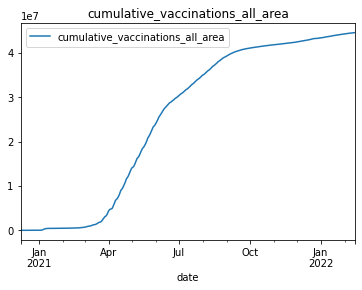

In [ ]:
# 1. Aggregate the data as an intermediate dataframe
# Get the unique date to a array
unique_date = covid_data['date'].unique()

# Empty list to store cumulative cases and cumulative deaths in all areas
cumulative_vaccinations_all_area = []

# Create a intermediate datafame by date
intermediate_df = pd.DataFrame(unique_date, columns = ['date'])

# Use the array to loop over and sum up cumulative cases in all area.
for date in unique_date:
  temp_covid_data =  covid_data.loc[covid_data['date'] == date]
  temp_vaccinated_sum = temp_covid_data['cumulative_vaccinated'].sum()
  cumulative_vaccinations_all_area.append(temp_vaccinated_sum)

# Add cumulative cases in all areas as a column to intermediate dataframe
intermediate_df = pd.concat([intermediate_df, pd.Series(cumulative_vaccinations_all_area)], ignore_index = True, axis = 1)

# Rename the columns
intermediate_df = intermediate_df.rename(columns={0:'date', 1:'cumulative_vaccinations_all_area'})


# 2. Plot to visualised the transformed data
intermediate_df.plot(x = 'date', y = 'cumulative_vaccinations_all_area', title = 'cumulative_vaccinations_all_area')


# 3. Are there any relationships between the trends seen here and the ones seen in Task 21?
# Answer: Yes, there is a relationship. The cumulative vaccinations of all areas 
#         increase rapidly from April to June, and after June, cumulative deaths start to 
#         decrease, which means the percentage of people who are fully vaccinated 
#         reached to a certain point.


**Task 24**

area
East Midlands               AxesSubplot(0.125,0.125;0.775x0.755)
East of England             AxesSubplot(0.125,0.125;0.775x0.755)
London                      AxesSubplot(0.125,0.125;0.775x0.755)
North East                  AxesSubplot(0.125,0.125;0.775x0.755)
North West                  AxesSubplot(0.125,0.125;0.775x0.755)
Scotland                    AxesSubplot(0.125,0.125;0.775x0.755)
South East                  AxesSubplot(0.125,0.125;0.775x0.755)
South West                  AxesSubplot(0.125,0.125;0.775x0.755)
West Midlands               AxesSubplot(0.125,0.125;0.775x0.755)
Yorkshire and The Humber    AxesSubplot(0.125,0.125;0.775x0.755)
Name: daily_cases_roll_avg, dtype: object

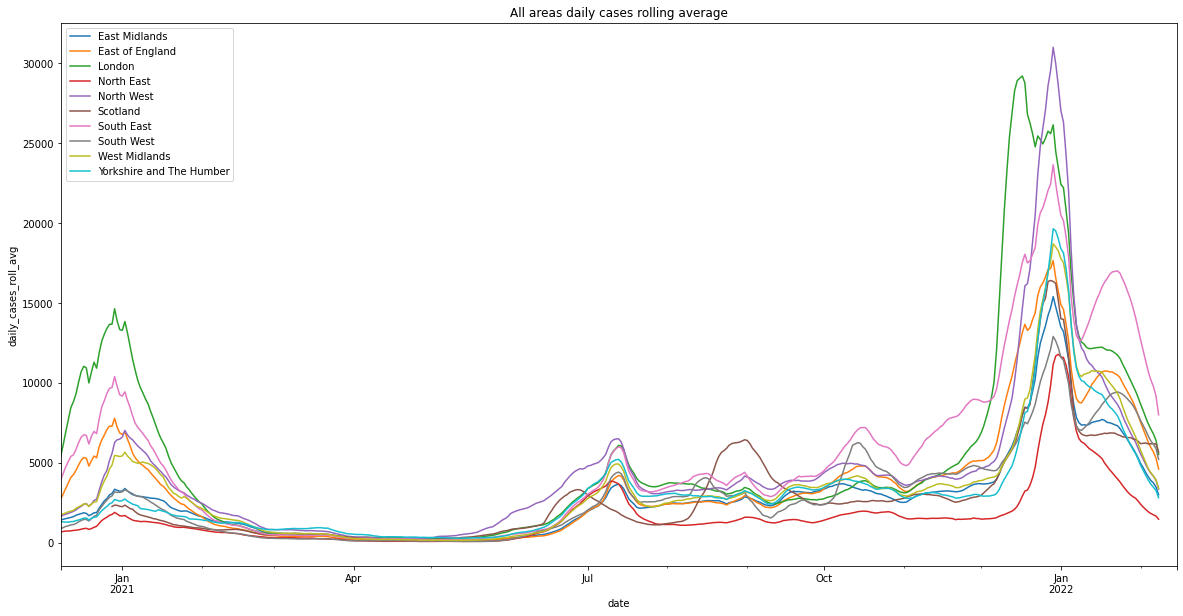

In [ ]:
# 1. Aggregate the data as an intermediate dataframe
covid_data = covid_data.reset_index()
intermediate_df = covid_data
intermediate_df.set_index("date", inplace=True)


# 2. Plot to visualised the transformed data
intermediate_df.reset_index()
intermediate_df.groupby('area')['daily_cases_roll_avg'].plot(legend=True, xlabel="date", ylabel="daily_cases_roll_avg", figsize=(20,10), title = 'All areas daily cases rolling average')


# 3. Is there a specific area that seems to escape the general trend in any way? 
#    Which one and how?
# Answer: Yes, Scotland district. In the beginning of July, the daily cases rolling average of 
#         Scotland district strats to going down, while other regions's daily
#         cases rolling average started to increase. Then after August, 
#         the daily cases rolling average of other districts are quite stable, however, 
#         the daily cases rolling average in Scotland district increased.


**Task 25**

area
East of England    AxesSubplot(0.125,0.125;0.775x0.755)
Scotland           AxesSubplot(0.125,0.125;0.775x0.755)
Name: daily_cases_roll_avg, dtype: object

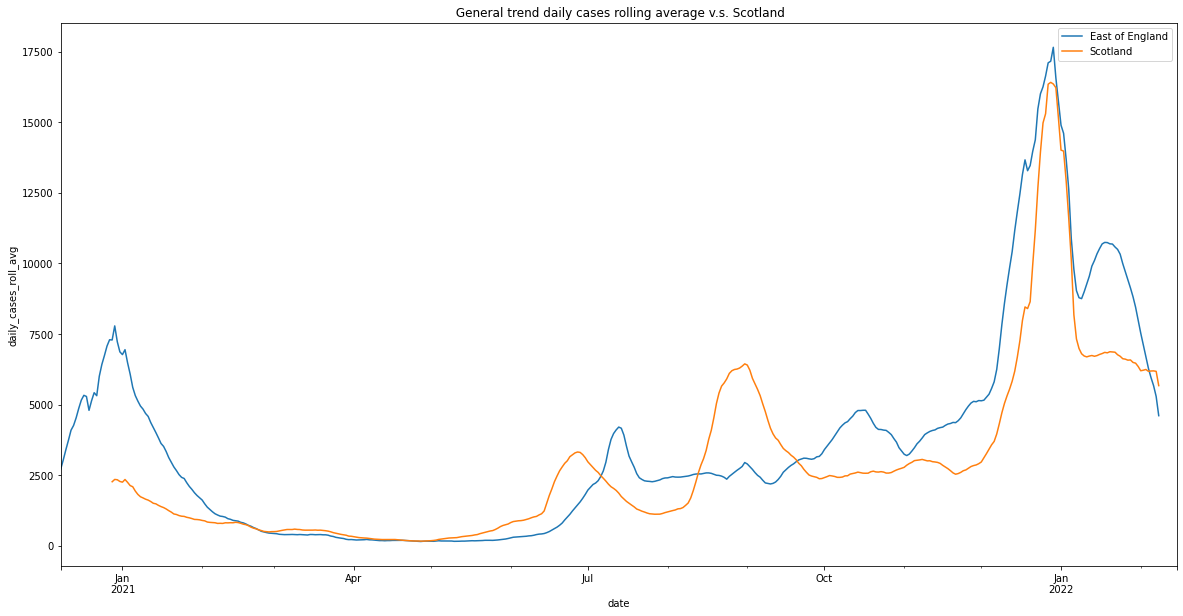

In [ ]:
# 1. Aggregate the data as an intermediate dataframe
covid_data = covid_data.reset_index()
intermediate_df = covid_data
intermediate_df.set_index("date", inplace=True)
intermediate_df.reset_index()

# Select only North East and East of England (Because the pattern of East of England follows general trend.)
intermediate_df = intermediate_df[intermediate_df.area.isin(['East of England', 'Scotland'])]


# 2. Plot to visualised the transformed data
intermediate_df.groupby('area')['daily_cases_roll_avg'].plot(legend=True, xlabel="date", ylabel="daily_cases_roll_avg", figsize=(20,10), title = ' General trend daily cases rolling average v.s. Scotland')


# 3. What reasons there might be to justify this difference?
# Answer: I think is because during that period, more tests conducted in Scotland, 
#         that is why the case number sharp rised from the mid of August to September.


**Task 26**

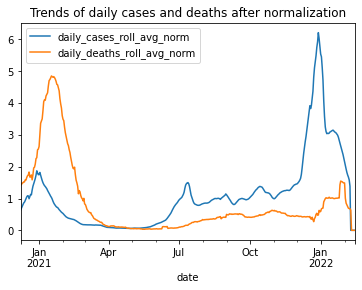

In [ ]:
# 1. Aggregate the data as an intermediate dataframe
# Normalize daily cases rolling average and daily deaths rolling average
covid_data = covid_data.reset_index()
covid_data['daily_cases_roll_avg_norm'] = (covid_data['daily_cases_roll_avg'] / covid_data['daily_cases_roll_avg'].max())
covid_data['daily_deaths_roll_avg_norm'] = (covid_data['daily_deaths_roll_avg'] / covid_data['daily_deaths_roll_avg'].max())

# Get the unique date to a array
unique_date = covid_data['date'].unique()

# Empty list to store cumulative cases and cumulative deaths in all areas
daily_cases_roll_avg_norm = []
daily_deaths_roll_avg_norm = []

# Create a intermediate datafame by date
intermediate_df = pd.DataFrame(unique_date, columns = ['date'])

# Use the array to loop over and sum up cumulative cases in all area.
for date in unique_date:
  temp_covid_data = covid_data.loc[covid_data['date'] == date]
  temp_daily_cases_roll_avg_norm = temp_covid_data['daily_cases_roll_avg_norm'].sum()
  temp_daily_deaths_roll_avg_norm = temp_covid_data['daily_deaths_roll_avg_norm'].sum()
  daily_cases_roll_avg_norm.append(temp_daily_cases_roll_avg_norm)
  daily_deaths_roll_avg_norm.append(temp_daily_deaths_roll_avg_norm)

# Add cumulative cases in all areas as a column to intermediate dataframe
intermediate_df = pd.concat([intermediate_df, pd.Series(daily_cases_roll_avg_norm)], ignore_index = True, axis = 1)
intermediate_df = pd.concat([intermediate_df, pd.Series(daily_deaths_roll_avg_norm)], ignore_index = True, axis = 1)

# Rename the columns
intermediate_df = intermediate_df.rename(columns={0:'date', 1:'daily_cases_roll_avg_norm', 2:'daily_deaths_roll_avg_norm'})

# 2. Plot to visualised the transformed data
intermediate_df.plot(x = 'date', y = ['daily_cases_roll_avg_norm', 'daily_deaths_roll_avg_norm'], title = 'Trends of daily cases and deaths after normalization')


# 3. Are daily trends of cases and deaths increasing and decreasing at the same rates? 
#    What part of the plot tells you this?
# Answer: From January to May, daily deaths rolling average basically followed the
#         trend of daily cases rolling average. After May, even daily cases 
#         increased rapidly, but daily deaths is quite stable.


**Task 27**

'\n     Answer: There is a strategy employed. As the plot shows, elder people get vaccinated first, then younger people. \n             The reason why the government doing this vaccination strategy is that when elder people get covid, \n             elder people will be more easily to be intensive illness than younger people. Therefore, to protect elder people, \n             the government let elder people get vaccination first.\n'

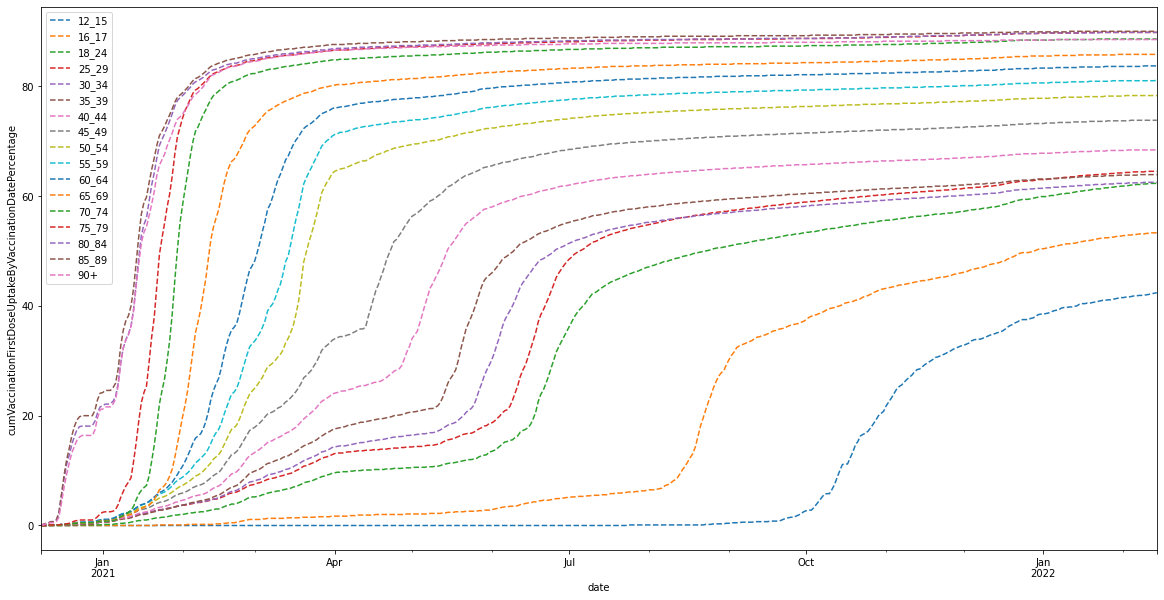

In [ ]:
# 1. Aggregate the data as an intermediate dataframe
intermediate_df = covid_data_vaccinations_wide
intermediate_df = intermediate_df.loc[covid_data_vaccinations_wide['area'] == 'London']
unique_date = intermediate_df['date'].unique()
intermediate_df.set_index("date", inplace=True)


# 2. Plot to visualised the transformed data
intermediate_df.reset_index()
intermediate_df.groupby('age')['cumVaccinationFirstDoseUptakeByVaccinationDatePercentage'].plot(legend=True, xlabel="date", 
                                                                                                ylabel="cumVaccinationFirstDoseUptakeByVaccinationDatePercentage", figsize=(20,10)
                                                                                                , style = ['--' for _ in range(10)])

# 3. Were all age groups vaccinated equally and at the same time, or was there a strategy employed? 
#    What strategy does the plot indicate and why?
"""
     Answer: There is a strategy employed. As the plot shows, elder people get vaccinated first, then younger people. 
             The reason why the government doing this vaccination strategy is that when elder people get covid, 
             elder people will be more easily to be intensive illness than younger people. Therefore, to protect elder people, 
             the government let elder people get vaccination first.
"""


**Task 28**

age
12_15    AxesSubplot(0.125,0.125;0.775x0.755)
16_17    AxesSubplot(0.125,0.125;0.775x0.755)
18_29    AxesSubplot(0.125,0.125;0.775x0.755)
30_39    AxesSubplot(0.125,0.125;0.775x0.755)
40_49    AxesSubplot(0.125,0.125;0.775x0.755)
50_54    AxesSubplot(0.125,0.125;0.775x0.755)
55_59    AxesSubplot(0.125,0.125;0.775x0.755)
60_64    AxesSubplot(0.125,0.125;0.775x0.755)
65_69    AxesSubplot(0.125,0.125;0.775x0.755)
70_74    AxesSubplot(0.125,0.125;0.775x0.755)
75_79    AxesSubplot(0.125,0.125;0.775x0.755)
80+      AxesSubplot(0.125,0.125;0.775x0.755)
Name: cumVaccinationFirstDoseUptakeByVaccinationDatePercentage, dtype: object

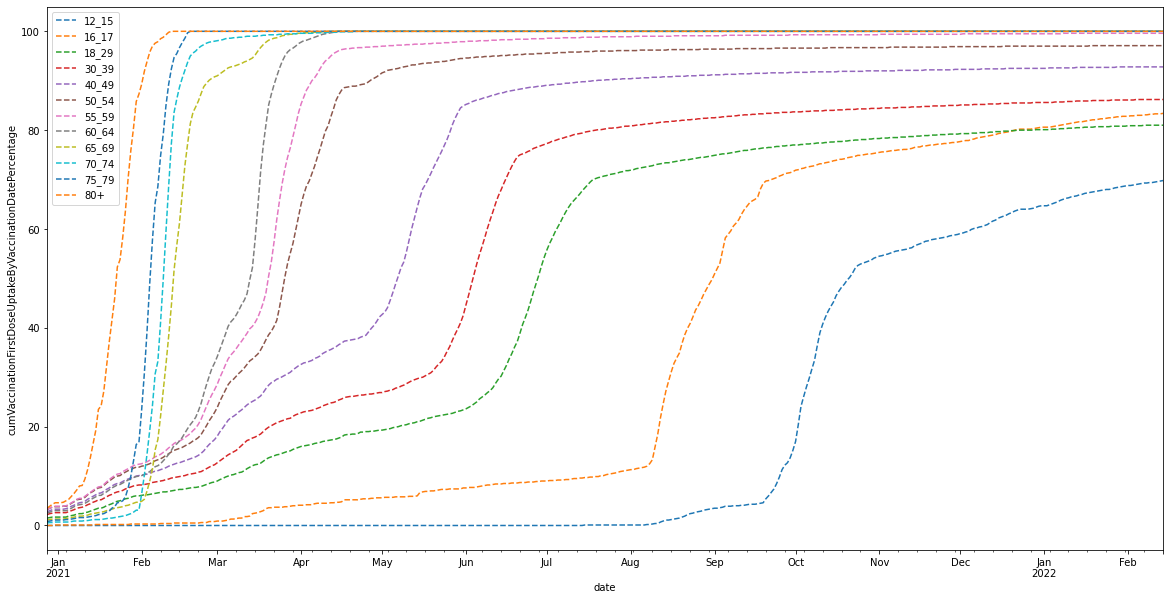

In [ ]:
# 1. Aggregate the data as an intermediate dataframe
intermediate_df = covid_data_vaccinations_wide
intermediate_df = intermediate_df.loc[covid_data_vaccinations_wide['area'] == 'Scotland']
unique_date = intermediate_df['date'].unique()
intermediate_df.set_index("date", inplace=True)


# 2. Plot to visualised the transformed data
intermediate_df.reset_index()
intermediate_df.groupby('age')['cumVaccinationFirstDoseUptakeByVaccinationDatePercentage'].plot(legend=True, xlabel="date", 
                                                                                                ylabel="cumVaccinationFirstDoseUptakeByVaccinationDatePercentage", figsize=(20,10)
                                                                                                , style = ['--' for _ in range(10)])


# 3. In both plots, compare how vaccination evolved for two sections of population: 50-64 years and 65-79 years.
#    Were there any differences in the strategies employed between London and Scotland for dealing with both sections?
#    Answer: There is no huge difference in the strategies of the order of people gets vaccinated in different ages.
#            But people in Scotland, ages 50-64 and 65-79, all have a higher percentage of vaccination than people in
#            London. And people in London start vaccination nearly a month early than people in Scotland.
